In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, log_loss, classification_report)
from imblearn.over_sampling import SMOTE
import xgboost

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import pickle

In [2]:
attrition = pd.read_csv("D:\Downloads\Full_Stack_Project\Full_Stack_Project\Employee_Attrition_Prediction.csv")

In [3]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
print(attrition.iloc[3])

Age                                             33
Attrition                                       No
BusinessTravel                   Travel_Frequently
DailyRate                                     1392
Department                  Research & Development
DistanceFromHome                                 3
Education                                        4
EducationField                       Life Sciences
EmployeeCount                                    1
EmployeeNumber                                   5
EnvironmentSatisfaction                          4
Gender                                      Female
HourlyRate                                      56
JobInvolvement                                   3
JobLevel                                         1
JobRole                         Research Scientist
JobSatisfaction                                  3
MaritalStatus                              Married
MonthlyIncome                                 2909
MonthlyRate                    

In [5]:
attrition["YearsWithCurrManager"].unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14])

In [6]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
attrition.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

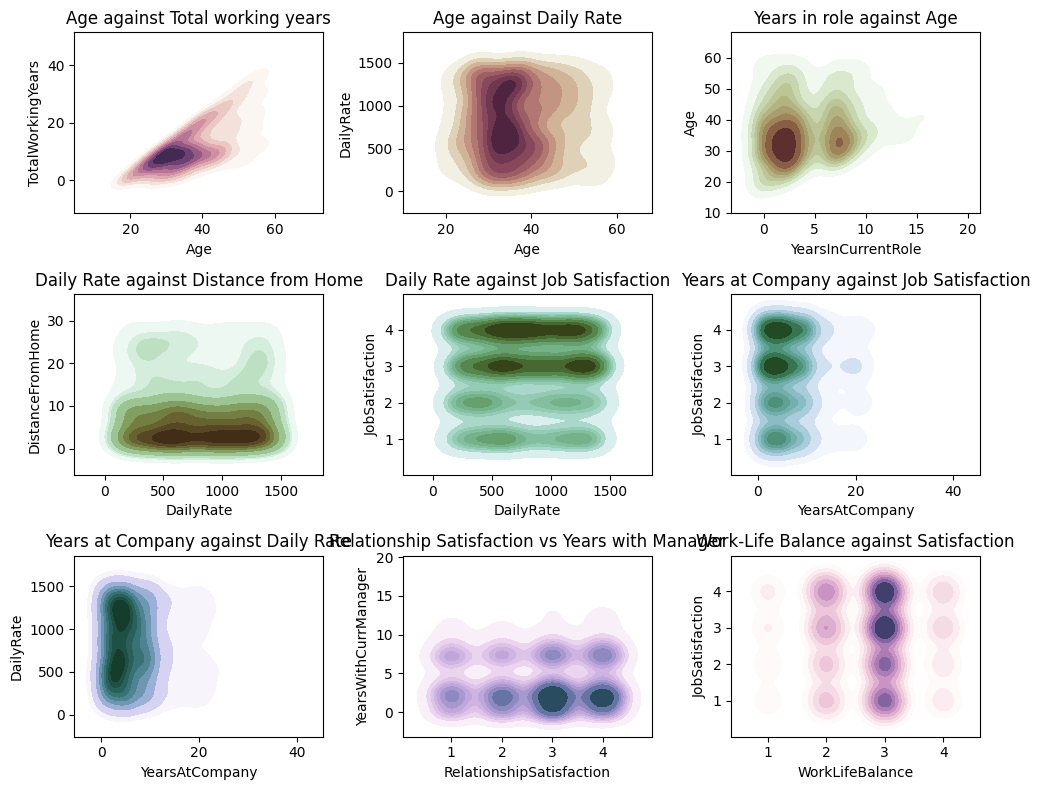

In [8]:
f, axes = plt.subplots(3, 3, figsize=(10, 8), sharex=False, sharey=False)

s = np.linspace(0, 3, 10)

cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)
sns.kdeplot(x=attrition['Age'], y=attrition['TotalWorkingYears'], cmap=cmap, fill=True, cut=5, ax=axes[0, 0])
axes[0, 0].set(title='Age against Total working years')

cmap = sns.cubehelix_palette(start=0.333, light=1, as_cmap=True)
sns.kdeplot(x=attrition['Age'], y=attrition['DailyRate'], cmap=cmap, fill=True, ax=axes[0, 1])
axes[0, 1].set(title='Age against Daily Rate')

cmap = sns.cubehelix_palette(start=0.666, light=1, as_cmap=True)
sns.kdeplot(x=attrition['YearsInCurrentRole'], y=attrition['Age'], cmap=cmap, fill=True, ax=axes[0, 2])
axes[0, 2].set(title='Years in role against Age')

cmap = sns.cubehelix_palette(start=1.0, light=1, as_cmap=True)
sns.kdeplot(x=attrition['DailyRate'], y=attrition['DistanceFromHome'], cmap=cmap, fill=True, ax=axes[1, 0])
axes[1, 0].set(title='Daily Rate against Distance from Home')

cmap = sns.cubehelix_palette(start=1.333, light=1, as_cmap=True)
sns.kdeplot(x=attrition['DailyRate'], y=attrition['JobSatisfaction'], cmap=cmap, fill=True, ax=axes[1, 1])
axes[1, 1].set(title='Daily Rate against Job Satisfaction')

cmap = sns.cubehelix_palette(start=1.666, light=1, as_cmap=True)
sns.kdeplot(x=attrition['YearsAtCompany'], y=attrition['JobSatisfaction'], cmap=cmap, fill=True, ax=axes[1, 2])
axes[1, 2].set(title='Years at Company against Job Satisfaction')

cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)
sns.kdeplot(x=attrition['YearsAtCompany'], y=attrition['DailyRate'], cmap=cmap, fill=True, ax=axes[2, 0])
axes[2, 0].set(title='Years at Company against Daily Rate')

cmap = sns.cubehelix_palette(start=2.333, light=1, as_cmap=True)
sns.kdeplot(x=attrition['RelationshipSatisfaction'], y=attrition['YearsWithCurrManager'], cmap=cmap, fill=True, ax=axes[2, 1])
axes[2, 1].set(title='Relationship Satisfaction vs Years with Manager')

cmap = sns.cubehelix_palette(start=2.666, light=1, as_cmap=True)
sns.kdeplot(x=attrition['WorkLifeBalance'], y=attrition['JobSatisfaction'], cmap=cmap, fill=True, ax=axes[2, 2])
axes[2, 2].set(title='Work-Life Balance against Satisfaction')

f.tight_layout()

plt.show()


In [9]:
# target_map = {'Yes':1, 'No':0}
# attrition["Attrition_numerical"] = attrition["Attrition"].apply(lambda x: target_map[x])

# numerical = [u'Age', u'DailyRate', u'DistanceFromHome', 
#              u'Education', u'EmployeeNumber', u'EnvironmentSatisfaction',
#              u'HourlyRate', u'JobInvolvement', u'JobLevel', u'JobSatisfaction',
#              u'MonthlyIncome', u'MonthlyRate', u'NumCompaniesWorked',
#              u'PercentSalaryHike', u'PerformanceRating', u'RelationshipSatisfaction',
#              u'StockOptionLevel', u'TotalWorkingYears',
#              u'TrainingTimesLastYear', u'WorkLifeBalance', u'YearsAtCompany',
#              u'YearsInCurrentRole', u'YearsSinceLastPromotion',u'YearsWithCurrManager']
# data = [
#     go.Heatmap(
#         z= attrition[numerical].astype(float).corr().values,
#         x=attrition[numerical].columns.values,
#         y=attrition[numerical].columns.values,
#         colorscale='Cividis',
#         reversescale = False,
#         opacity = 1.0
        
#     )
# ]

# layout = go.Layout(
#     title='Pearson Correlation of numerical features',
#     xaxis = dict(ticks='', nticks=36),
#     yaxis = dict(ticks='' ),
#     width = 900, height = 700,
    
# )

# fig = go.Figure(data=data, layout=layout)

# fig.show()


In [10]:
X = attrition.drop(columns=["Attrition"])
y = attrition["Attrition"].map({"Yes": 1, "No": 0})


In [11]:
y.value_counts()

Attrition
0    1233
1     237
Name: count, dtype: int64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.55, random_state=0)

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime']
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64'] and col not in categorical_cols]

In [13]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

In [14]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=0)),
    ("classifier", RandomForestClassifier(
        n_jobs=-1,
        n_estimators=1000,
        max_depth=4,
        min_samples_leaf=2,
        max_features='sqrt',
        random_state=0,
        verbose=0
    ))
])

In [15]:
pipeline.fit(X_train, y_train)
rf_predictions =pipeline.predict(X_test)
print("Accuracy score: {}".format(accuracy_score(y_test, rf_predictions)))
print("="*80)
print(classification_report(y_test, rf_predictions))

Accuracy score: 0.8564954682779456
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       557
           1       0.55      0.49      0.52       105

    accuracy                           0.86       662
   macro avg       0.73      0.71      0.72       662
weighted avg       0.85      0.86      0.85       662



In [16]:
import pickle
pickle_model_path="model.pkl"
with open(pickle_model_path, "wb") as f:
    pickle.dump(pipeline, f)
